In [2]:
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
from matplotlib.font_manager import fontManager
import seaborn as sns

In [3]:
fontManager.addfont('TaipeiSansTCBeta-Regular.ttf')
matplotlib.rc('font', family='Taipei Sans TC Beta')
plt.rcParams['font.sans-serif'] = ['Taipei Sans TC Beta']
plt.rcParams['axes.unicode_minus'] = False
sns.set(font=['sans-serif'])
sns.set_style("whitegrid", {"font.sans-serif": ['Taipei Sans TC Beta']})

In [4]:
df = pd.read_csv('./datasource/BaHaMut_9.csv')
df

,動畫名,年份,月份,集數,星級,評分人數,導演監督,製作廠商,作品分類1,作品分類2,作品分類3,作品分類4,作品分類5,作品分類6,原作載體,新續作,平均觀看數(萬),總觀看數(萬)
0,叫我對大哥 (TV版),2021,夏番,12,4.8,600,青木純,Fanworks、SPACE NEKO COMPANY,喜劇,悠閒,泡麵番,闔家觀賞,NaN,NaN,漫畫改編,新作,1.8,21.7
1,汪汪與喵喵,2020,秋番,24,4.8,200,岸誠二,Team Till Dawn,喜劇,溫馨,泡麵番,闔家觀賞,NaN,NaN,漫畫改編,新作,0.3,6.6
2,鬼滅之刃 刀匠村篇,2023,春番,11,4.8,18600,外崎春雄,ufotable,動作,冒險,奇幻,血腥暴力,NaN,NaN,漫畫改編,續作,49.9,548.8
3,IDOLiSH7 - 偶像星願 - Third BEAT！,2021,夏番,30,4.8,1300,別所誠人,TROYCA,偶像,音樂,NaN,NaN,NaN,NaN,遊戲改編,續作,1.9,56.0
4,薄櫻鬼 新OVA,2021,秋番,3,4.8,300,ヤマサキオサム,Studio DEEN,奇幻,戀愛,歷史,NaN,NaN,NaN,遊戲改編,續作,1.6,4.9
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
433,土下座跪求給看 年齡限制版,2020,秋番,13,4.5,1700,永居慎平,アドネロ,動作,喜劇,勵志,18禁,NaN,NaN,漫畫改編,新作,8.0,103.4
434,女神宿舍的管理員。 年齡限制版,2021,夏番,10,4.7,2300,中重俊祐,Asread,校園,喜劇,戀愛,18禁,NaN,NaN,漫畫改編,新作,11.3,112.7
435,彼得・格里爾的賢者時間 年齡限制版,2020,夏番,12,4.2,1600,辰美,Wolfsbane,奇幻,喜劇,18禁,NaN,NaN,NaN,漫畫改編,新作,11.2,133.9
436,壽司大相撲,2021,春番,52,4.1,400,助川勇太,白組,喜劇,悠閒,闔家觀賞,泡麵番,NaN,NaN,漫畫改編,新作,0.4,23.3


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 438 entries, 0 to 437
Data columns (total 18 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   動畫名       438 non-null    object 
 1   年份        438 non-null    int64  
 2   月份        438 non-null    object 
 3   集數        438 non-null    int64  
 4   星級        438 non-null    float64
 5   評分人數      438 non-null    int64  
 6   導演監督      436 non-null    object 
 7   製作廠商      438 non-null    object 
 8   作品分類1     438 non-null    object 
 9   作品分類2     434 non-null    object 
 10  作品分類3     316 non-null    object 
 11  作品分類4     142 non-null    object 
 12  作品分類5     44 non-null     object 
 13  作品分類6     5 non-null      object 
 14  原作載體      438 non-null    object 
 15  新續作       438 non-null    object 
 16  平均觀看數(萬)  438 non-null    float64
 17  總觀看數(萬)   438 non-null    float64
dtypes: float64(3), int64(3), object(12)
memory usage: 61.7+ KB


<Axes: xlabel='星級', ylabel='平均觀看數(萬)'>

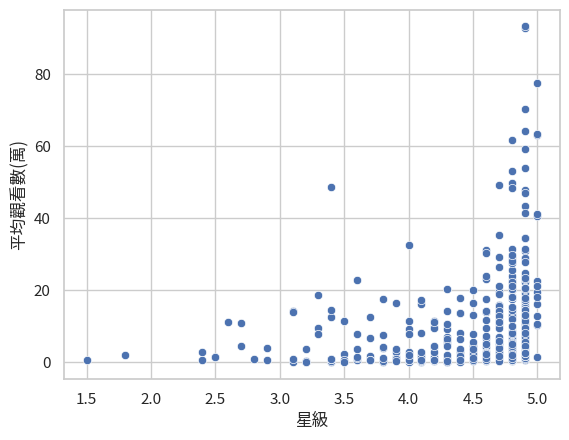

In [6]:
sns.scatterplot(data=df, x="星級", y="平均觀看數(萬)")

count    438.000000
mean      10.668493
std       13.564352
min        0.000000
25%        1.900000
50%        5.850000
75%       13.975000
max       93.300000
Name: 平均觀看數(萬), dtype: float64

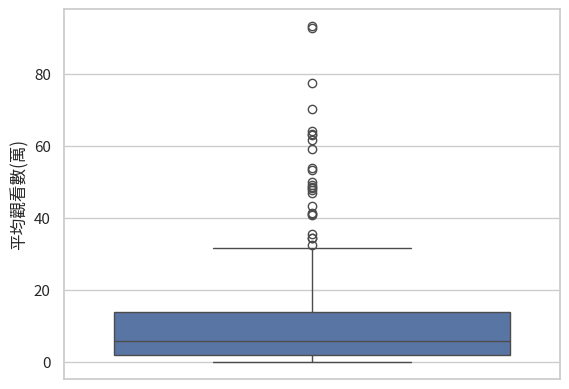

In [7]:
sns.boxplot(data=df['平均觀看數(萬)'])
df['平均觀看數(萬)'].describe()

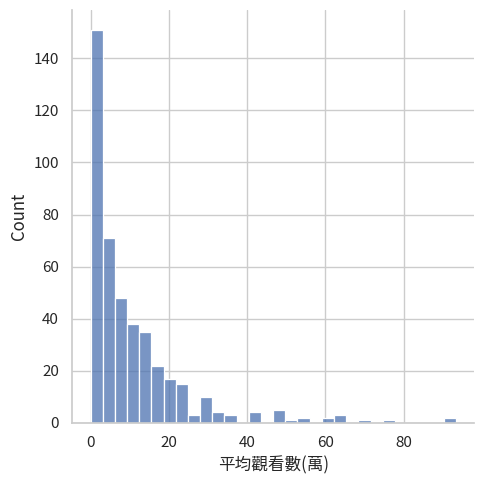

In [8]:
sns.displot(data=df, x='平均觀看數(萬)')

In [9]:
df1 = df[df['平均觀看數(萬)'] >= 14].sort_values('平均觀看數(萬)', ascending=False)
df1

,動畫名,年份,月份,集數,星級,評分人數,導演監督,製作廠商,作品分類1,作品分類2,作品分類3,作品分類4,作品分類5,作品分類6,原作載體,新續作,平均觀看數(萬),總觀看數(萬)
426,咒術迴戰,2020,秋番,24,4.9,20200,朴性厚,MAPPA,動作,奇幻,超能力,校園,血腥暴力,靈異神怪,漫畫改編,新作,93.3,2238.1
99,鬼滅之刃 遊郭篇,2021,秋番,11,4.9,18000,外崎春雄,ufotable,動作,冒險,奇幻,血腥暴力,NaN,NaN,漫畫改編,續作,92.8,1021.2
303,輝夜姬想讓人告白～天才們的戀愛頭腦戰～ 第二季,2020,春番,12,5.0,20200,畠山守,A-1 Pictures,校園,喜劇,戀愛,NaN,NaN,NaN,漫畫改編,續作,77.6,930.6
68,SPY×FAMILY 間諜家家酒,2022,春番,25,4.9,52700,古橋一浩,WIT STUDIO×CloverWorks,動作,喜劇,親情,NaN,NaN,NaN,漫畫改編,續作,70.4,1760.3
16,【我推的孩子】,2023,春番,11,4.9,52600,平牧大輔,動畫工房 (DOGAKOBO),親情,偶像,懸疑,NaN,NaN,NaN,漫畫改編,新作,64.2,706.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27,魔王學院的不適任者～史上最強的魔王始祖，轉生就讀子孫們的學校～第二季,2023,冬番,12,4.6,6500,大沼心、田村正文,SILVER LINK.,冒險,奇幻,NaN,NaN,NaN,NaN,小說改編,續作,14.3,171.8
362,無能力者娜娜,2020,夏番,13,4.7,3800,石平信司,Bridge,超能力,校園,推理,懸疑,黑暗,NaN,漫畫改編,新作,14.2,184.3
406,世界盡頭的聖騎士,2021,秋番,12,4.3,4300,信田ユウ,Children's Playground Entertainment,冒險,奇幻,魔法,NaN,NaN,NaN,小說改編,續作,14.2,170.0
396,進化果實～不知不覺踏上勝利的人生～,2021,秋番,12,3.1,6900,奥村よしあき,HOTLINE,冒險,奇幻,異世界,NaN,NaN,NaN,小說改編,新作,14.0,168.0


In [17]:
df1.to_csv('./datasource/Top110_Animes.csv', index=False)

In [10]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Index: 110 entries, 426 to 132
Data columns (total 18 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   動畫名       110 non-null    object 
 1   年份        110 non-null    int64  
 2   月份        110 non-null    object 
 3   集數        110 non-null    int64  
 4   星級        110 non-null    float64
 5   評分人數      110 non-null    int64  
 6   導演監督      110 non-null    object 
 7   製作廠商      110 non-null    object 
 8   作品分類1     110 non-null    object 
 9   作品分類2     110 non-null    object 
 10  作品分類3     95 non-null     object 
 11  作品分類4     54 non-null     object 
 12  作品分類5     24 non-null     object 
 13  作品分類6     3 non-null      object 
 14  原作載體      110 non-null    object 
 15  新續作       110 non-null    object 
 16  平均觀看數(萬)  110 non-null    float64
 17  總觀看數(萬)   110 non-null    float64
dtypes: float64(3), int64(3), object(12)
memory usage: 16.3+ KB


<Axes: ylabel='平均觀看數(萬)'>

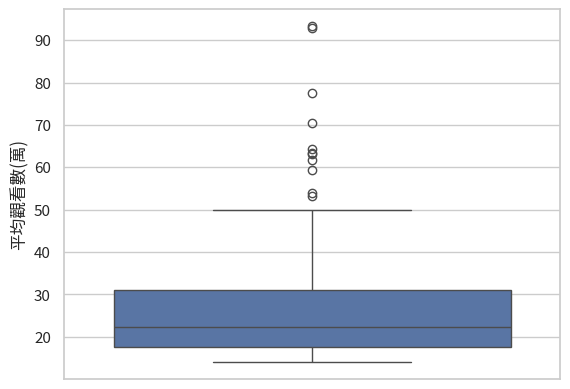

In [11]:
sns.boxplot(data=df1['平均觀看數(萬)'])

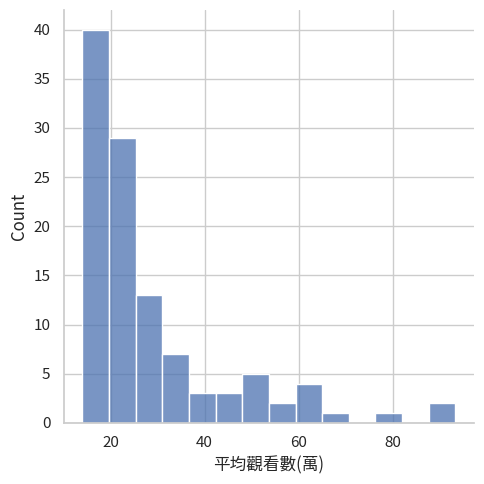

In [12]:
sns.displot(data=df1, x='平均觀看數(萬)')

In [13]:
df1['製作廠商'].value_counts()

製作廠商
A-1 Pictures                           8
SILVER LINK.                           6
J.C.STAFF                              5
MAPPA                                  4
CloverWorks                            4
8bit                                   4
BONES                                  4
EMT Squared                            3
ufotable                               3
動画工房                                   3
C2C                                    3
project No.9                           3
Lerche                                 3
diomedéa                               3
WIT STUDIO                             2
MADHOUSE                               2
Production I.G                         2
MAHO FILM                              2
Nexus                                  2
Passione                               2
LIDENFILMS                             2
feel.                                  2
Millepensee                            2
TMS Entertainment                      2
EMT Squared

In [52]:
AllTagDict = {}
df2 = df[['作品分類1', '作品分類2', '作品分類3', '作品分類4', '作品分類5', '作品分類6']]
count_list = []
for i in range(438):
    tags = df2.iloc[i].tolist()
    for tag in tags:
        if type(tag) == str:
            count_list.append(tag)
len(set(count_list))
for item in set(count_list):
    AllTagDict.update({item: count_list.count(item)})
df2 = df[['原作載體']]
count_list = []
for i in range(438):
    tags = df2.iloc[i].tolist()
    for tag in tags:
        if type(tag) == str:
            count_list.append(tag)
len(set(count_list))
for item in set(count_list):
    AllTagDict.update({item: count_list.count(item)})
df2 = df[['新續作']]
count_list = []
for i in range(438):
    tags = df2.iloc[i].tolist()
    for tag in tags:
        if type(tag) == str:
            count_list.append(tag)
len(set(count_list))
for item in set(count_list):
    AllTagDict.update({item: count_list.count(item)})
len(AllTagDict)

43

In [28]:
Top110_Dict = {}
df2 = df1[['作品分類1', '作品分類2', '作品分類3', '作品分類4', '作品分類5', '作品分類6']]
count_list = []
for i in range(110):
    tags = df2.iloc[i].tolist()
    for tag in tags:
        if type(tag) == str:
            count_list.append(tag)
len(set(count_list))
for item in set(count_list):
    Top110_Dict.update({item: count_list.count(item)})
df2 = df1[['原作載體']]
count_list = []
for i in range(110):
    tags = df2.iloc[i].tolist()
    for tag in tags:
        if type(tag) == str:
            count_list.append(tag)
len(set(count_list))
for item in set(count_list):
    Top110_Dict.update({item: count_list.count(item)})
df2 = df1[['新續作']]
count_list = []
for i in range(110):
    tags = df2.iloc[i].tolist()
    for tag in tags:
        if type(tag) == str:
            count_list.append(tag)
len(set(count_list))
for item in set(count_list):
    Top110_Dict.update({item: count_list.count(item)})
Top110_Dict

{'音樂': 3,
 '科幻': 9,
 '機甲': 2,
 '18禁': 1,
 '血腥暴力': 11,
 '異世界': 32,
 '戀愛': 22,
 '勵志': 12,
 '喜劇': 29,
 '運動': 3,
 '青春': 7,
 '溫馨': 4,
 '動作': 38,
 '魔法': 28,
 '超能力': 11,
 '冒險': 50,
 '時間穿越': 3,
 '偶像': 2,
 '職場': 1,
 '校園': 31,
 '料理': 1,
 '戰爭': 4,
 '靈異神怪': 7,
 '黑暗': 5,
 '推理': 4,
 '悠閒': 1,
 '奇幻': 61,
 '親情': 2,
 '懸疑': 8,
 '感人': 1,
 'GL': 1,
 '競技': 2,
 '遊戲改編': 1,
 '漫畫改編': 46,
 '小說改編': 56,
 '原創作品': 7,
 '續作': 52,
 '新作': 58}

In [15]:
for key in AllTagDict.keys():
    if key not in Top110_Dict.keys():
        print(key)

闔家觀賞
特攝
歷史
泡麵番
BL


In [59]:
a = []
for key in AllTagDict.keys():
    rate = round(Top110_Dict.get(key, 0) /
                 AllTagDict.get(key) * 100, ndigits=2)
    a.append((key, rate))
a = dict(a)
a

{'音樂': 8.82,
 '闔家觀賞': 0.0,
 '科幻': 17.31,
 '機甲': 13.33,
 '18禁': 12.5,
 '血腥暴力': 52.38,
 '異世界': 60.38,
 '戀愛': 30.99,
 '勵志': 32.43,
 '喜劇': 28.43,
 '運動': 10.34,
 '青春': 11.86,
 '溫馨': 9.3,
 '動作': 40.0,
 '魔法': 58.33,
 '超能力': 40.74,
 '冒險': 38.76,
 '歷史': 0.0,
 '時間穿越': 60.0,
 '偶像': 8.7,
 '職場': 4.55,
 '校園': 29.52,
 '料理': 12.5,
 '特攝': 0.0,
 '戰爭': 28.57,
 '靈異神怪': 21.88,
 '黑暗': 35.71,
 '推理': 23.53,
 '悠閒': 5.26,
 '泡麵番': 0.0,
 '奇幻': 42.07,
 '親情': 16.67,
 '懸疑': 33.33,
 'BL': 0.0,
 '感人': 20.0,
 'GL': 50.0,
 '競技': 5.88,
 '遊戲改編': 2.33,
 '漫畫改編': 22.33,
 '小說改編': 54.37,
 '原創作品': 8.14,
 '續作': 31.33,
 '新作': 21.32}

In [68]:
df_ratio = pd.DataFrame(
    {'全部': AllTagDict, '前25%': Top110_Dict, '比例(%)': a})
df_ratio = df_ratio.fillna(0)
df_ratio['前25%'] = pd.to_numeric(df_ratio['前25%'], downcast='integer')
df_ratio = df_ratio.sort_values('比例(%)', ascending=False)
df_ratio.to_csv('./datasource/ratio_table.csv', index_label='標籤')

In [69]:
df_ratio = pd.read_csv('./datasource/ratio_table.csv')
df_ratio

,標籤,全部,前25%,比例(%)
0,異世界,53,32,60.38
1,時間穿越,5,3,60.00
2,魔法,48,28,58.33
3,小說改編,103,56,54.37
4,血腥暴力,21,11,52.38
5,GL,2,1,50.00
6,奇幻,145,61,42.07
7,超能力,27,11,40.74
8,動作,95,38,40.00
9,冒險,129,50,38.76


In [75]:
df_group = df[['作品分類1', '作品分類2', '作品分類3', '作品分類4', '作品分類5', '作品分類6']]
df_group

,作品分類1,作品分類2,作品分類3,作品分類4,作品分類5,作品分類6
0,喜劇,悠閒,泡麵番,闔家觀賞,NaN,NaN
1,喜劇,溫馨,泡麵番,闔家觀賞,NaN,NaN
2,動作,冒險,奇幻,血腥暴力,NaN,NaN
3,偶像,音樂,NaN,NaN,NaN,NaN
4,奇幻,戀愛,歷史,NaN,NaN,NaN
...,...,...,...,...,...,...
433,動作,喜劇,勵志,18禁,NaN,NaN
434,校園,喜劇,戀愛,18禁,NaN,NaN
435,奇幻,喜劇,18禁,NaN,NaN,NaN
436,喜劇,悠閒,闔家觀賞,泡麵番,NaN,NaN


In [84]:
s1 = []
for i in range(438):
    s = []
    tags = df_group.iloc[i].to_list()
    for item in tags:
        if type(item) == str:
            s.append(item)
    s1.append(s)
s1

[['喜劇', '悠閒', '泡麵番', '闔家觀賞'],
 ['喜劇', '溫馨', '泡麵番', '闔家觀賞'],
 ['動作', '冒險', '奇幻', '血腥暴力'],
 ['偶像', '音樂'],
 ['奇幻', '戀愛', '歷史'],
 ['科幻', '機甲', '喜劇'],
 ['科幻', '機甲', '校園', '戰爭'],
 ['運動', '競技'],
 ['動作', '科幻', '喜劇', '職場'],
 ['冒險', '奇幻'],
 ['動作', '冒險', '科幻'],
 ['冒險', '喜劇', '闔家觀賞'],
 ['超能力', '科幻', '競技'],
 ['動作', '冒險', '奇幻'],
 ['親情', '懸疑', '黑暗'],
 ['動作', '冒險', '異世界', '血腥暴力'],
 ['親情', '偶像', '懸疑'],
 ['冒險', '奇幻', '異世界', '料理'],
 ['校園', '戀愛', '青春'],
 ['冒險', '奇幻'],
 ['冒險', '奇幻'],
 ['機甲', '歷史', '戰爭'],
 ['校園', '偶像', '音樂'],
 ['動作', '冒險', '奇幻'],
 ['冒險', '奇幻', '魔法', '戀愛', '溫馨'],
 ['校園', '青春', '勵志', '運動', '競技'],
 ['奇幻', '喜劇', '靈異神怪'],
 ['冒險', '奇幻'],
 ['冒險', '奇幻', '感人'],
 ['動作', '科幻', '黑暗'],
 ['喜劇', '青春', '悠閒'],
 ['喜劇', '戀愛'],
 ['喜劇', '泡麵番'],
 ['動作', '運動', '競技'],
 ['校園', '戀愛', '青春'],
 ['冒險', '奇幻'],
 ['校園', '喜劇', '戀愛', '靈異神怪'],
 ['動作', '超能力', '勵志', '溫馨', '感人', '靈異神怪'],
 ['科幻', '機甲', '戀愛'],
 ['奇幻', '靈異神怪'],
 ['冒險', '奇幻', '戰爭', '血腥暴力', '黑暗', '18禁'],
 ['冒險', '奇幻'],
 ['動作', '喜劇', '溫馨'],
 ['冒險', '奇幻'],
 ['動作', '血腥暴

In [ ]:
tag_group = []
for item in s1:
    if len(item) == 2:
        for i in range(1):
            tagStr = item[0] + item[i+1]
            tag_group.append(tagStr)
    if len(item) == 3:
        for i in range(2):
            tagStr = item[0] + item[i+1]
            tag_group.append(tagStr)
        for i in range(1,2):
            tagStr = item[1] + item[i+1]
            tag_group.append(tagStr)
    if len(item) == 4:
        for i in range(3):
            tagStr = item[0] + item[i+1]
            tag_group.append(tagStr)
        for i in range(1,3):
            tagStr = item[1] + item[i+1]
            tag_group.append(tagStr)
        for i in range(2, 3):
            tagStr = item[2] + item[i+1]
            tag_group.append(tagStr)
    if len(item) == 5:
        for i in range(4):
            tagStr = item[0] + item[i+1]
            tag_group.append(tagStr)
        for i in range(1, 4):
            tagStr = item[1] + item[i+1]
            tag_group.append(tagStr)
        for i in range(2, 4):
            tagStr = item[2] + item[i+1]
            tag_group.append(tagStr)
        for i in range(3, 4):
            tagStr = item[3] + item[i+1]
            tag_group.append(tagStr)
    if len(item) == 6:    
        for i in range(5):
            tagStr = item[0] + item[i+1]
            tag_group.append(tagStr)
        for i in range(1, 5):
            tagStr = item[1] + item[i+1]
            tag_group.append(tagStr)
        for i in range(2, 5):
            tagStr = item[2] + item[i+1]
            tag_group.append(tagStr)
        for i in range(3, 5):
            tagStr = item[3] + item[i+1]
            tag_group.append(tagStr)
        for i in range(4, 5):
            tagStr = item[4] + item[i+1]
            tag_group.append(tagStr)

In [86]:
'喜劇' + '悠閒'
for j in range(1,3):
    print(j)

1
2
